In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from sympy import integrate, exp, sin, log, oo, pi,symbols
import deepxde as dde
import scipy.io as scio
from mpl_toolkits.mplot3d import Axes3D
from deepxde.backend import tf
import datetime
import os
from pylab import mpl
from scipy.signal import chirp, spectrogram
mpl.rcParams['font.sans-serif']=['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus']=False
from matplotlib.pyplot import MultipleLocator
import xlrd
import xlwt
from sympy import *
import sympy as sp

%run Solution_ex1.ipynb

def Plot_dis():
    import re
    lines = open("s1-s2.dat", "r").readlines()
    S = np.array(
        [
            np.fromstring(
                min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
                sep=",",
            )
            for line in lines
        ]
    )
    markersize = 10
    markevery = 50
    plt.figure()
    l = S.shape[0]
    width, height, dpi = 4, 2.7, 150
    plt.figure(figsize=(width,height),dpi = dpi)
    markersize = 2
    markevery = 20
    plt.plot(range(0, 200 * l, 200), S[:,0:1], linestyle='dashed',linewidth=0.7, \
             marker='^',markersize=markersize,markevery=markevery, label="s1",color='orange')
    plt.plot(range(0, 200 * l, 200), S[:,1:2], linestyle='dashed',linewidth=0.7, \
             marker='+',markersize=markersize,markevery=markevery, label="s2",color='#884B8B')
    plt.plot(range(0, 200 * l, 200), S[:,2:3], linestyle='dashed',linewidth=0.7, \
             marker='1',markersize=markersize,markevery=markevery, label="s3",color='#004B8B')
    plt.plot(range(0, 200 * l, 200), S[:,0:1]*0+0.4,linewidth=0.7, label="exact",color='green')
    plt.plot(range(0, 200 * l, 200), S[:,0:1]*0+0.9,linewidth=0.7, label="exact",color='lightcoral')
    plt.plot(range(0, 200 * l, 200), S[:,0:1]*0+2,linewidth=0.7, label="exact",color='#900000')
    plt.tick_params(width=0.5, labelsize=6)
    plt.xlabel('epoch', fontsize=8)
    plt.legend(fontsize=6,frameon=False,bbox_to_anchor=(0.92, 0.7))
    plt.show()
    data_s = np.hstack((np.array([range(0, 200 * l, 200)]).reshape(-1,1),S))
    print(S[-1])

Compiling model...
Building feed-forward neural network...
'build' took 0.035039 s



2024-10-28 13:49:38.348333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-28 13:49:38.348467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-28 13:49:38.348541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-28 13:49:38.348627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-28 13:49:38.348711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

'compile' took 3.683434 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.11e+03, 2.49e+04, 2.54e+02]    [3.11e+03, 2.49e+04, 2.54e+02]    []  
1000      [4.54e-01, 2.18e+02, 6.88e+01]    [4.54e-01, 2.18e+02, 6.88e+01]    []  
2000      [1.14e-02, 1.23e+02, 1.76e+01]    [1.14e-02, 1.23e+02, 1.76e+01]    []  
3000      [1.52e-03, 6.25e+01, 6.85e+00]    [1.52e-03, 6.25e+01, 6.85e+00]    []  
4000      [4.40e-03, 2.74e+01, 2.21e+00]    [4.40e-03, 2.74e+01, 2.21e+00]    []  
5000      [3.85e-03, 1.06e+01, 5.91e-01]    [3.85e-03, 1.06e+01, 5.91e-01]    []  
6000      [1.93e-03, 3.84e+00, 1.48e-01]    [1.93e-03, 3.84e+00, 1.48e-01]    []  
7000      [8.19e-04, 1.31e+00, 3.95e-02]    [8.19e-04, 1.31e+00, 3.95e-02]    []  
8000      [3.22e-04, 4.21e-01, 1.25e-02]    [3.22e-04, 4.21e-01, 1.25e-02]    []  
9000      [1.35e-04, 1.28e-01, 4.78e-03]    [1.35e-04, 1.28e-01, 4.78e-03]    []  
10000     [5.70e-05, 3.91e-02, 2.0

<Figure size 640x480 with 0 Axes>

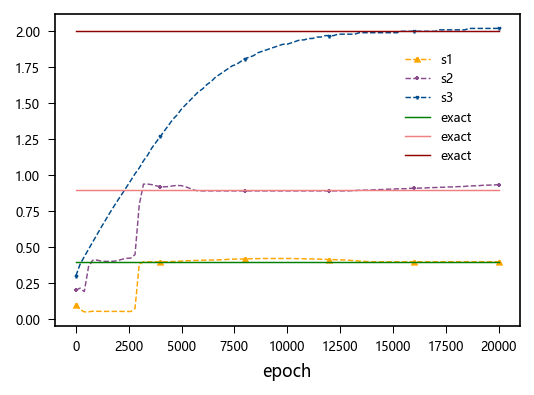

[0.398 0.935 2.02  0.159 0.345 0.67 ]


In [15]:
np.random.seed(1234)
tf.set_random_seed(1234)

s1 = tf.math.abs(tf.Variable(0.1, trainable=True, dtype=tf.float32))
s2 = tf.math.abs(tf.Variable(0.2, trainable=True, dtype=tf.float32))
s3 = tf.math.abs(tf.Variable(0.3, trainable=True, dtype=tf.float32))

c1 = (tf.Variable(0, trainable=True, dtype=tf.float32))
c2 = (tf.Variable(0, trainable=True, dtype=tf.float32))
c3 = (tf.Variable(0, trainable=True, dtype=tf.float32))

num_domain = 100
epochs=20000
lr = 1e-3
u_nodenum=20
u_layer=2

activation_func1 = tf.nn.tanh
L = 3
def f1(x_in):
    cond1 = tf.logical_and(tf.greater_equal(x_in, 0), tf.less(x_in, 0.4))
    cond2 = tf.logical_and(tf.greater_equal(x_in, 0.4), tf.less(x_in, 0.9))
    cond3 = tf.logical_and(tf.greater_equal(x_in, 0.9), tf.less(x_in, 2))
    f1 = x_in*0+4
    f2 = x_in*-2+4.8
    f3 = 0*x_in+3
    f4 = 0*x_in+2
    f = tf.where(cond1, f1, tf.where(cond2, f2, tf.where(cond3, f3, f4)))
    return f

def f2(x_in):
    cond1 = tf.logical_and(tf.greater_equal(x_in, 0.4), tf.less(x_in, 0.9))
    f1 = x_in*0-2
    f2 = x_in*0
    f = tf.where(cond1, f1, f2)
    return f

def beampde(x, y):
    x_in = x[:,0:1]
    fai = y[:,0:4]
    M = y[:,4:8]
    
    M0_dNN = dde.grad.jacobian(fai, x, i =0, j=0)
    M1_dNN = dde.grad.jacobian(fai, x, i =1, j=0)
    M2_dNN = dde.grad.jacobian(fai, x, i =2, j=0)
    M3_dNN = dde.grad.jacobian(fai, x, i =3, j=0)
    
    V0_dNN = dde.grad.jacobian(M, x, i =0, j=0)
    V1_dNN = dde.grad.jacobian(M, x, i =1, j=0)
    V2_dNN = dde.grad.jacobian(M, x, i =2, j=0)
    V3_dNN = dde.grad.jacobian(M, x, i =3, j=0)
    
    f1_sig = 10*tf.keras.activations.relu(x_in+s1)*tf.keras.activations.relu(-x_in+s1)
    f2_sig = 10*tf.keras.activations.relu(x_in-s1)*tf.keras.activations.relu(-x_in+s2)
    f3_sig = 10*tf.keras.activations.relu(x_in-s2)*tf.keras.activations.relu(-x_in+s3)
    f4_sig = 10*tf.keras.activations.relu(x_in-s3)*tf.keras.activations.relu(-x_in+L+(L-s3))

    return [(M[:,0:1]-M0_dNN)*f1_sig+(M[:,1:2]-M1_dNN)*f2_sig+(M[:,2:3]-M2_dNN)*f3_sig+(M[:,3:4]-M3_dNN)*f4_sig,\
            (M[:,0:1]-f1(x_in))*f1_sig+(M[:,1:2]-f1(x_in))*f2_sig+(M[:,2:3]-f1(x_in))*f3_sig+(M[:,3:4]-f1(x_in))*f4_sig,\
           ((V0_dNN-f2(x_in))*f1_sig+(V1_dNN-f2(x_in))*f2_sig+(V2_dNN-f2(x_in))*f3_sig+(V3_dNN-f2(x_in))*f4_sig)]

def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)
def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], L)
geom = dde.geometry.Interval(0, L)

data = dde.data.TimePDE(geom,beampde,[], num_domain=num_domain)
net = dde.maps.FNN([1]  + [50]*3 + [8], "tanh", "Glorot uniform")

def modify_output(X, y):
    x = X[:,0:1]
    fai = y[:,0:4]
    M = y[:,4:8]
    final_output = tf.concat([fai[:,0:1]*x*(x-s1)+10*c1*x/s1,
                              fai[:,1:2]*(x-s1)*(x-s2)+10*c1*(x-s2)/(s1-s2)+10*c2*(x-s1)/(s2-s1),
                              fai[:,2:3]*(x-s2)*(x-s3)+10*c2*(x-s3)/(s2-s3)+10*c3*(x-s2)/(s3-s2),
                              fai[:,3:4]*(x-s3)+10*c3,
                              M], axis=1)
    return final_output

net.apply_output_transform(modify_output)
model = dde.Model(data, net)
model.compile("adam", lr,loss_weights=[1,1,1])
variable = dde.callbacks.VariableValue([s1,s2,s3,c1,c2,c3], period=200, filename="s1-s2.dat")#200为epochs之间的间隔
losshistory, train_state = model.train(epochs=epochs, callbacks=[variable])
dde.saveplot(losshistory, train_state, issave=True, isplot=False)
Plot_dis()
list_point = []
list_reslut = []

[0.398 0.935 2.02  0.159 0.345 0.67 ]
norm_Fai,norm_M,norm_V [0.0013908  0.02789216 0.26486493 0.00302689]
Weight [ 1.          9.21477803 87.5038522 ]
Compiling model...
'compile' took 4.372279 s

Adding new point: [[0.90044235]] 

Adding new point: [[0.90075419]] 

Adding new point: [[0.90134098]] 

Adding new point: [[0.90142419]] 

Adding new point: [[0.90161949]] 

Training model...

Step      Train loss                        Test loss                         Test metric
20000     [2.72e-04, 1.99e-03, 4.68e-01]    [2.85e-04, 2.08e-03, 1.64e-03]    []  
21000     [3.90e-07, 7.02e-08, 3.71e-04]    [4.09e-07, 7.37e-08, 3.62e-04]    []  
22000     [3.09e-07, 4.20e-07, 2.30e-04]    [3.24e-07, 4.41e-07, 2.42e-04]    []  
23000     [2.28e-07, 4.89e-08, 1.55e-04]    [2.39e-07, 5.13e-08, 1.62e-04]    []  
24000     [1.80e-04, 1.36e-03, 1.67e-03]    [1.89e-04, 1.42e-03, 1.76e-03]    []  
25000     [2.14e-07, 1.60e-08, 7.02e-05]    [2.24e-07, 1.68e-08, 7.37e-05]    []  
26000     [1.96e-04,

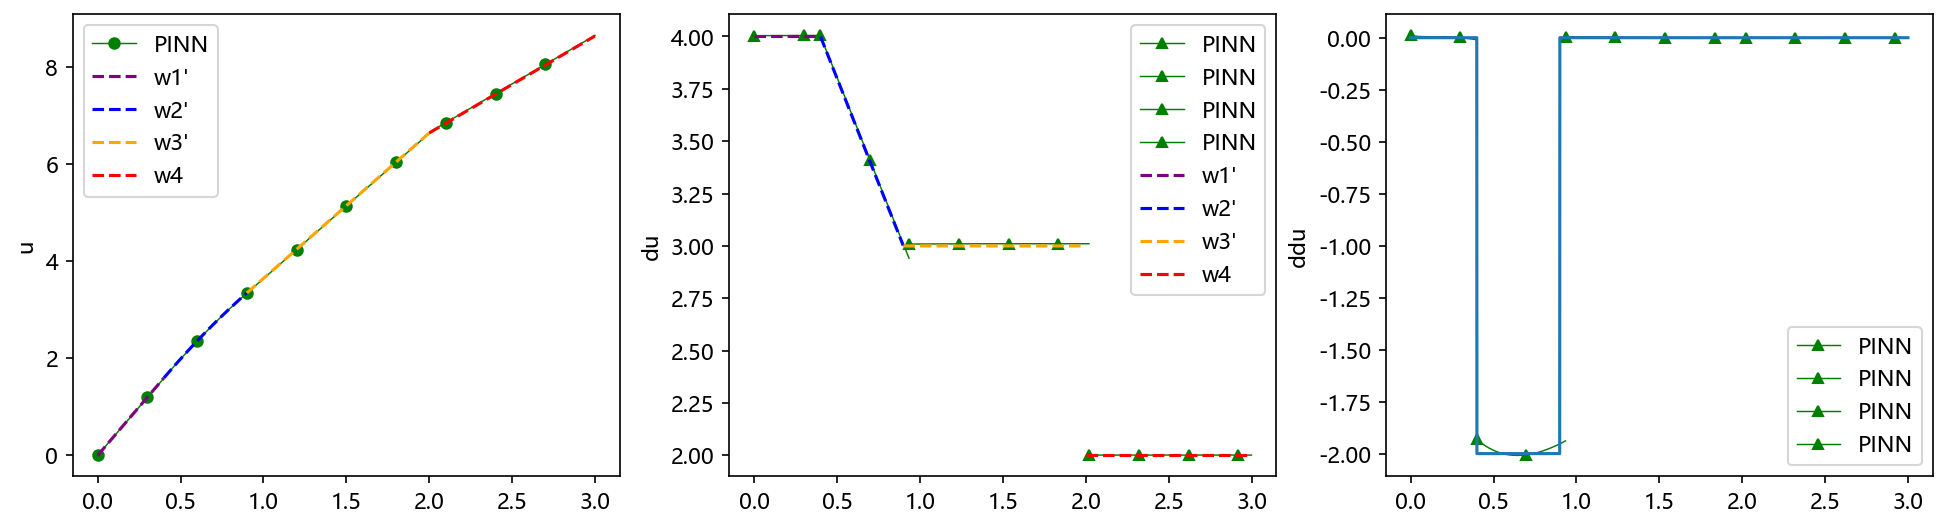

<Figure size 640x480 with 0 Axes>

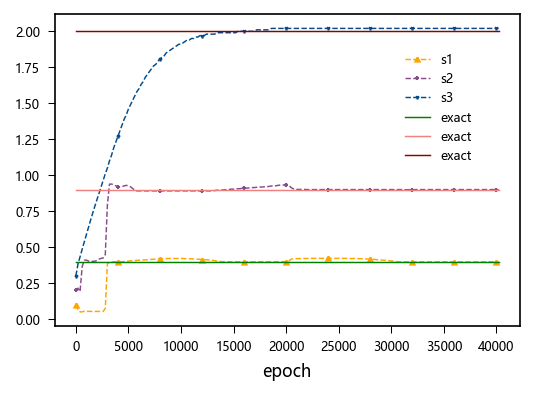

[0.398 0.9   2.02  0.159 0.335 0.67 ]
[0.398 0.9   2.02  0.159 0.335 0.67 ]
norm_Fai,norm_M,norm_V [0.00158528 0.02759337 0.06330401 0.00112238]
Weight [ 1.         24.58471863 56.40165015]
Compiling model...
'compile' took 5.209885 s

Adding new point: [[2.0003714]] 

Adding new point: [[2.00125304]] 

Adding new point: [[2.00147486]] 

Adding new point: [[2.0018468]] 

Adding new point: [[2.00217279]] 

Training model...

Step      Train loss                        Test loss                         Test metric
40000     [7.63e-05, 2.90e-02, 3.04e-04]    [8.39e-05, 1.65e-03, 3.34e-04]    []  
41000     [1.92e-07, 1.12e-08, 2.28e-06]    [2.11e-07, 1.45e-09, 2.51e-06]    []  
42000     [1.14e-07, 2.64e-09, 2.21e-06]    [1.25e-07, 1.28e-09, 2.43e-06]    []  
43000     [1.13e-07, 1.74e-09, 2.18e-06]    [1.24e-07, 1.31e-09, 2.39e-06]    []  
44000     [1.12e-07, 1.23e-09, 2.15e-06]    [1.23e-07, 1.31e-09, 2.36e-06]    []  
45000     [1.12e-07, 1.15e-09, 2.11e-06]    [1.23e-07, 1.26e-09, 2.

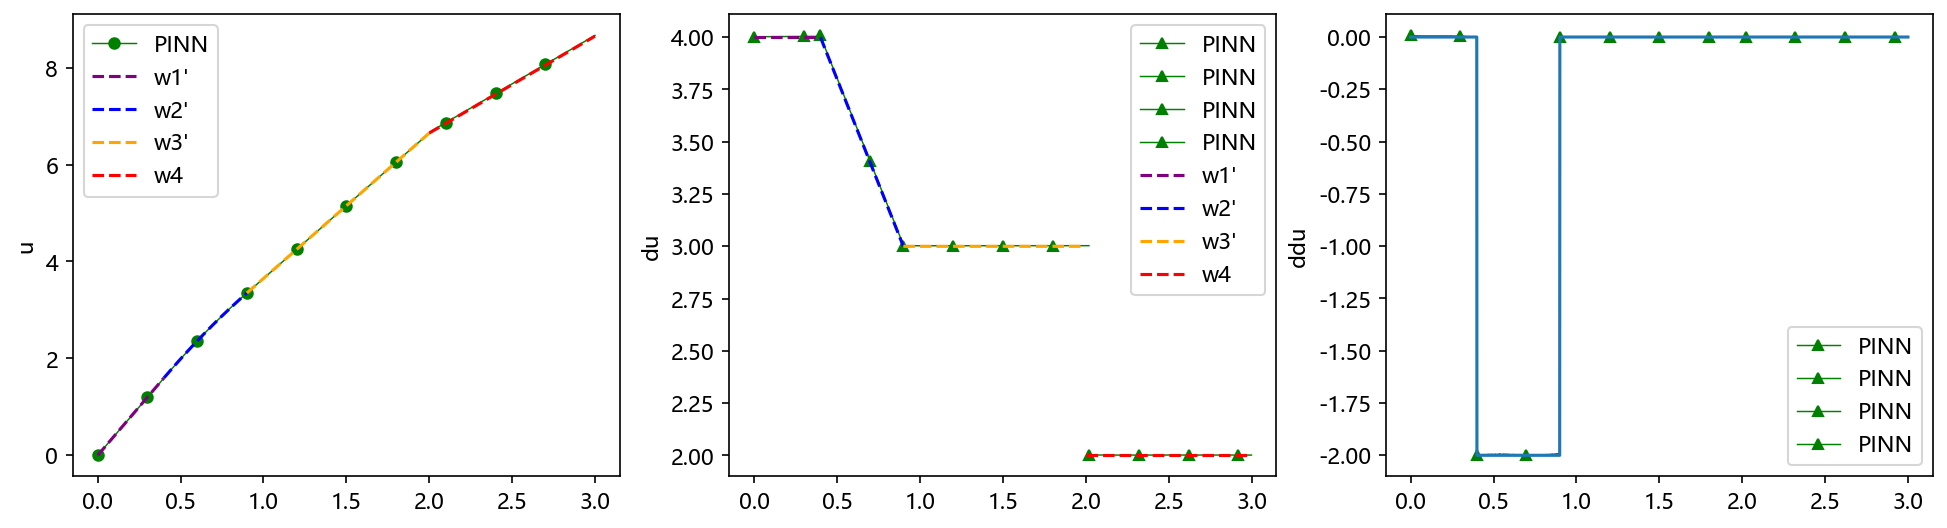

<Figure size 640x480 with 0 Axes>

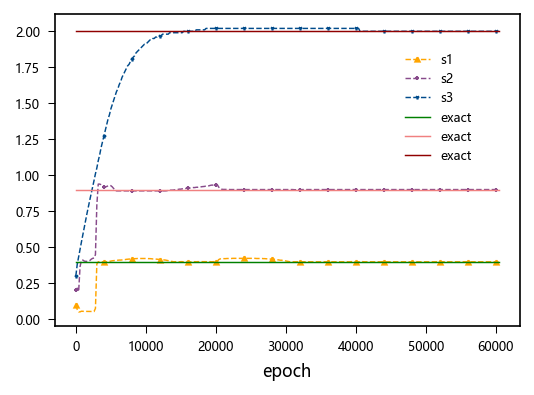

[0.398 0.9   2.    0.159 0.335 0.665]
[0.398 0.9   2.    0.159 0.335 0.665]
norm_Fai,norm_M,norm_V [2.63400272e-05 1.07434801e-04 6.33543292e-02 1.44820093e-04]
Weight [  1.34798121   1.         589.70025068]
Compiling model...
'compile' took 5.985400 s

Adding new point: [[0.39963374]] 

Adding new point: [[0.39919804]] 

Adding new point: [[0.39883905]] 

Adding new point: [[2.99979703]] 

Adding new point: [[2.99891615]] 

Training model...

Step      Train loss                        Test loss                         Test metric
60000     [2.95e-07, 1.44e-10, 1.14e-03]    [1.70e-07, 1.58e-10, 1.76e-05]    []  
61000     [2.55e-05, 1.77e-05, 2.53e-03]    [2.81e-05, 1.90e-05, 2.91e-03]    []  
62000     [2.44e-07, 2.12e-10, 1.36e-05]    [1.95e-07, 2.43e-10, 1.56e-05]    []  
63000     [2.53e-07, 7.28e-09, 1.37e-05]    [2.27e-07, 7.76e-09, 1.56e-05]    []  
64000     [1.86e-06, 7.56e-07, 9.45e-05]    [1.69e-06, 7.96e-07, 1.09e-04]    []  
65000     [2.40e-07, 1.16e-09, 1.17e-05]    [1

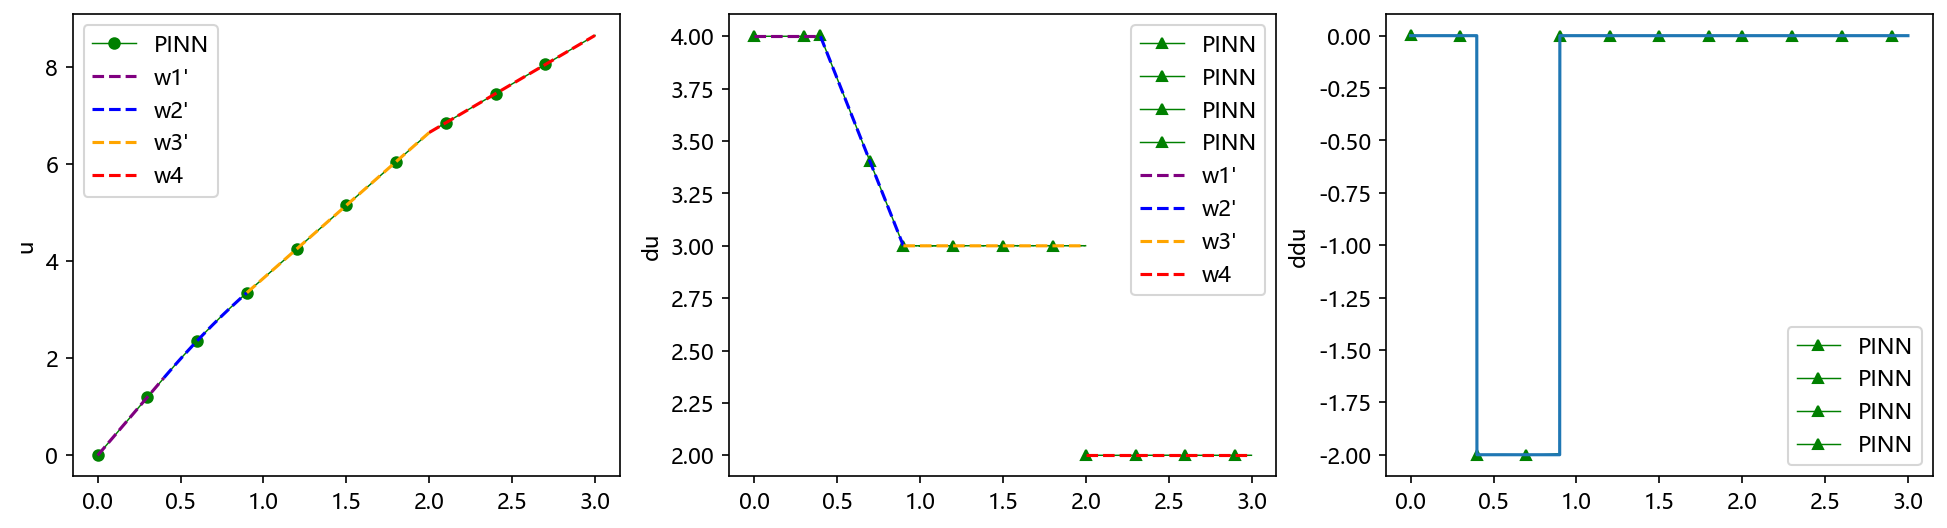

<Figure size 640x480 with 0 Axes>

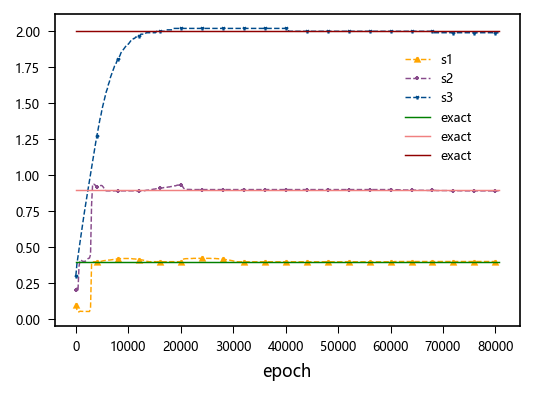

[0.4   0.891 1.99  0.16  0.332 0.663]
[0.4   0.891 1.99  0.16  0.332 0.663]
norm_Fai,norm_M,norm_V [0.00086246 0.01942779 0.13423316 0.00050612]
Weight [  1.          38.38549701 265.21842986]
Compiling model...
'compile' took 6.842923 s

Adding new point: [[0.89991074]] 

Adding new point: [[0.89940006]] 

Adding new point: [[0.8992881]] 

Adding new point: [[0.89912706]] 

Adding new point: [[0.89907712]] 

Training model...

Step      Train loss                        Test loss                         Test metric
80000     [1.63e-05, 4.70e-04, 3.98e-01]    [1.84e-05, 5.18e-04, 6.45e-04]    []  
81000     [1.75e-07, 1.01e-09, 3.55e-06]    [1.59e-07, 1.19e-09, 4.19e-06]    []  
82000     [8.45e-07, 7.26e-06, 5.02e-06]    [1.00e-06, 7.90e-06, 5.93e-06]    []  
83000     [1.44e-07, 8.04e-10, 3.43e-06]    [1.27e-07, 9.52e-10, 4.07e-06]    []  
84000     [1.39e-07, 1.62e-09, 3.40e-06]    [1.22e-07, 1.93e-09, 4.04e-06]    []  
85000     [2.04e-07, 1.84e-06, 4.62e-06]    [1.83e-07, 2.08e-06

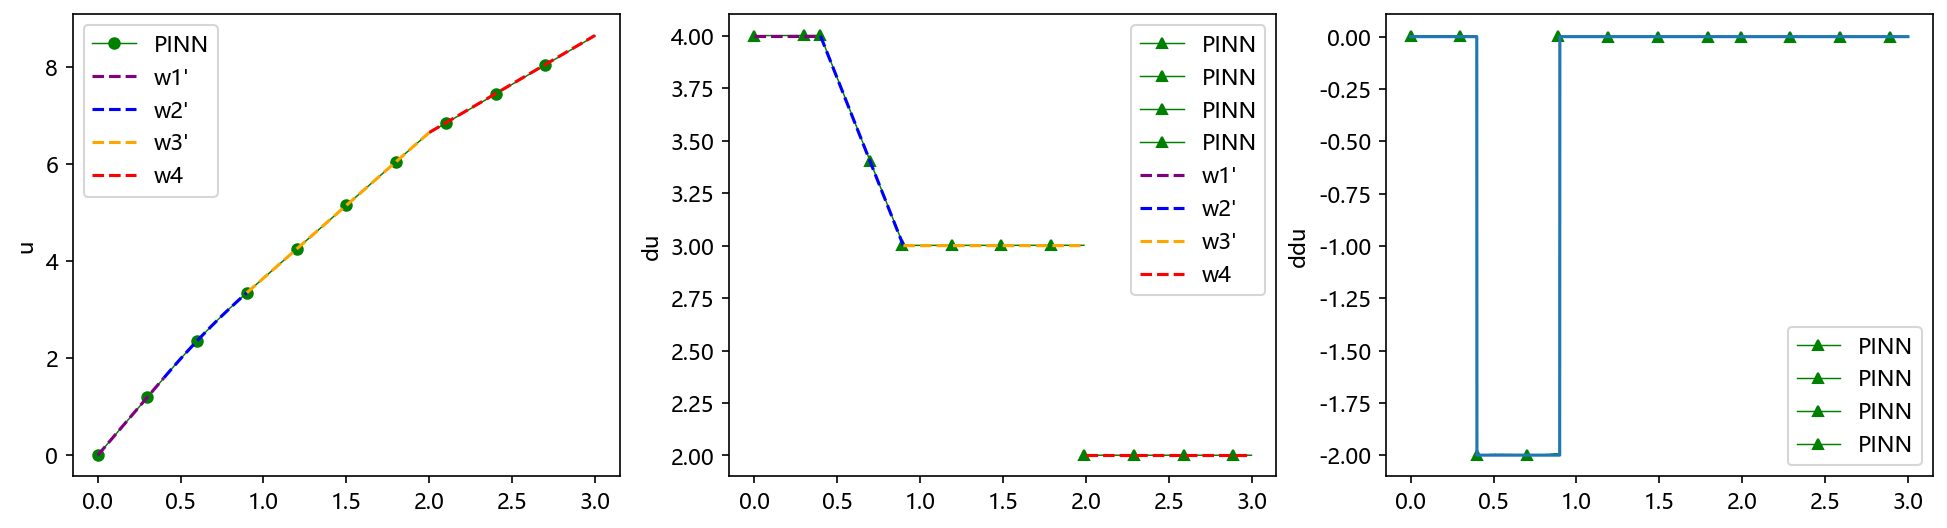

<Figure size 640x480 with 0 Axes>

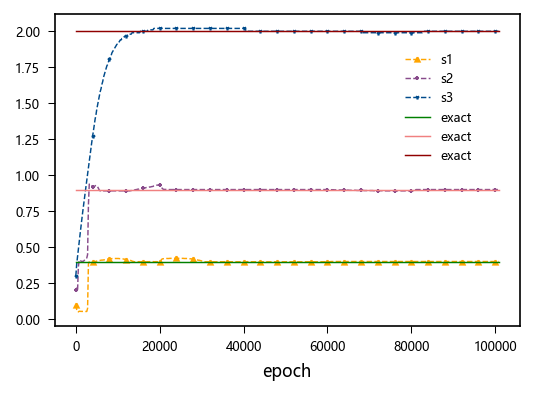

[0.4   0.9   2.    0.16  0.335 0.665]
[0.4   0.9   2.    0.16  0.335 0.665]
norm_Fai,norm_M,norm_V [2.05806704e-05 2.11312524e-04 8.26048562e-04 2.32981649e-04]
Weight [1.10254539 1.         3.90913206]
Compiling model...
'compile' took 7.923825 s

Adding new point: [[2.99979218]] 

Adding new point: [[2.9996404]] 

Adding new point: [[2.99914724]] 

Adding new point: [[2.99903996]] 

Adding new point: [[2.99888995]] 

Training model...

Step      Train loss                        Test loss                         Test metric
100000    [2.43e-07, 2.66e-11, 4.69e-08]    [1.21e-07, 3.24e-11, 5.85e-08]    []  
101000    [1.78e-07, 8.85e-11, 4.79e-08]    [1.65e-07, 3.01e-11, 5.98e-08]    []  
102000    [4.62e-06, 1.51e-06, 1.73e-07]    [3.68e-06, 1.38e-06, 2.16e-07]    []  
103000    [1.24e-07, 1.23e-10, 4.80e-08]    [1.32e-07, 6.38e-11, 5.98e-08]    []  
104000    [1.17e-07, 8.59e-11, 5.09e-08]    [1.30e-07, 5.64e-11, 6.32e-08]    []  
105000    [1.13e-07, 7.54e-11, 5.29e-08]    [1.28e-07

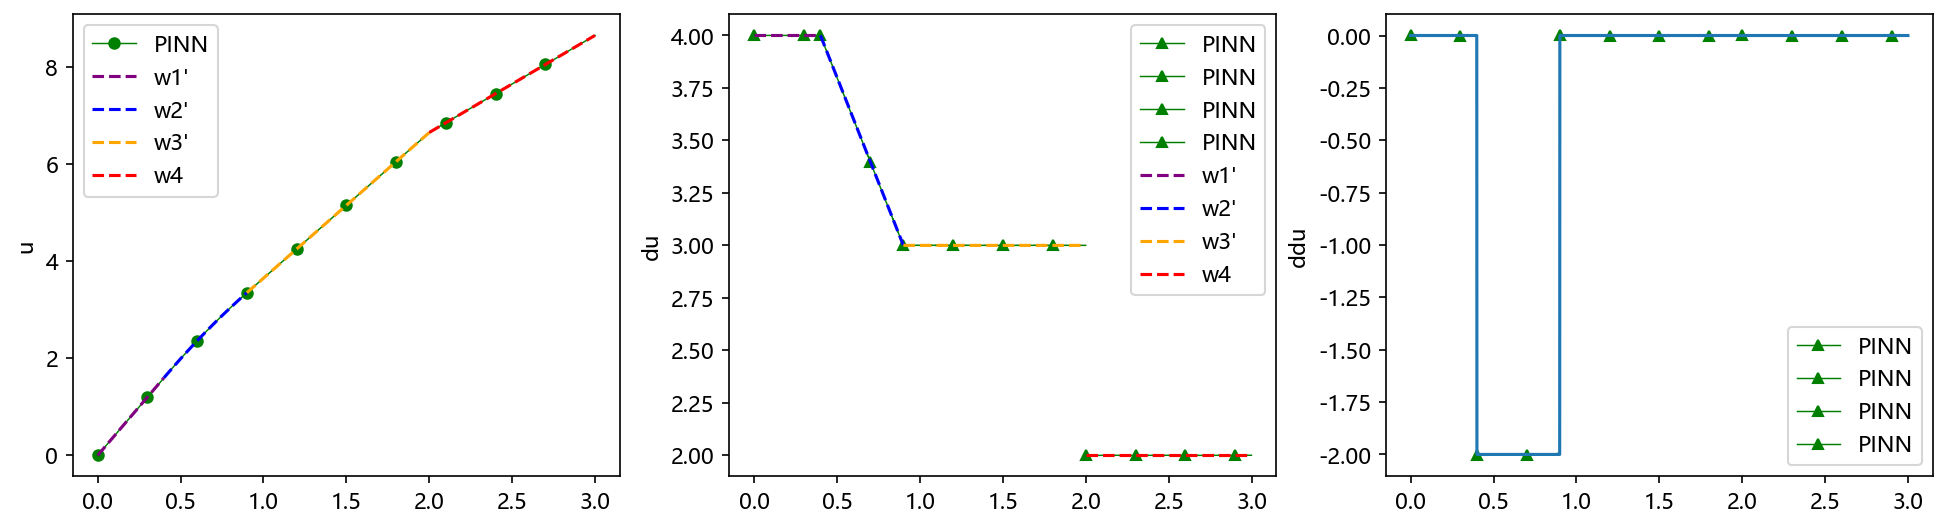

<Figure size 640x480 with 0 Axes>

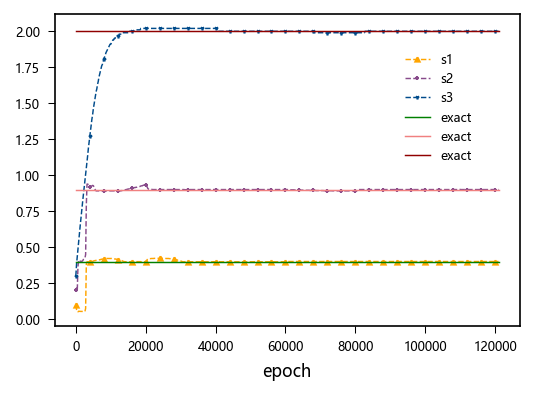

[0.4   0.9   2.    0.16  0.335 0.665]
[0.4   0.9   2.    0.16  0.335 0.665]
norm_Fai,norm_M,norm_V [5.62234604e-05 1.83941960e-04 7.85958507e-04 2.12634681e-04]
Weight [1.15598791 1.         4.27286144]
Compiling model...
'compile' took 8.441022 s

Adding new point: [[2.00009774]] 

Adding new point: [[0.39992861]] 

Adding new point: [[2.0001926]] 

Adding new point: [[0.39979591]] 

Adding new point: [[2.10330694]] 

Training model...

Step      Train loss                        Test loss                         Test metric
120000    [8.14e-08, 1.31e-07, 4.09e-07]    [9.26e-08, 4.99e-10, 8.67e-08]    []  
121000    [8.12e-08, 1.16e-10, 6.75e-08]    [9.29e-08, 1.02e-10, 8.31e-08]    []  
122000    [7.54e-08, 1.14e-10, 6.54e-08]    [8.52e-08, 1.06e-10, 8.08e-08]    []  
123000    [7.38e-08, 9.37e-11, 6.48e-08]    [8.30e-08, 8.98e-11, 8.04e-08]    []  
124000    [7.22e-08, 8.65e-11, 6.26e-08]    [8.04e-08, 7.82e-11, 7.80e-08]    []  
125000    [7.41e-08, 1.09e-10, 6.32e-08]    [8.34e-08

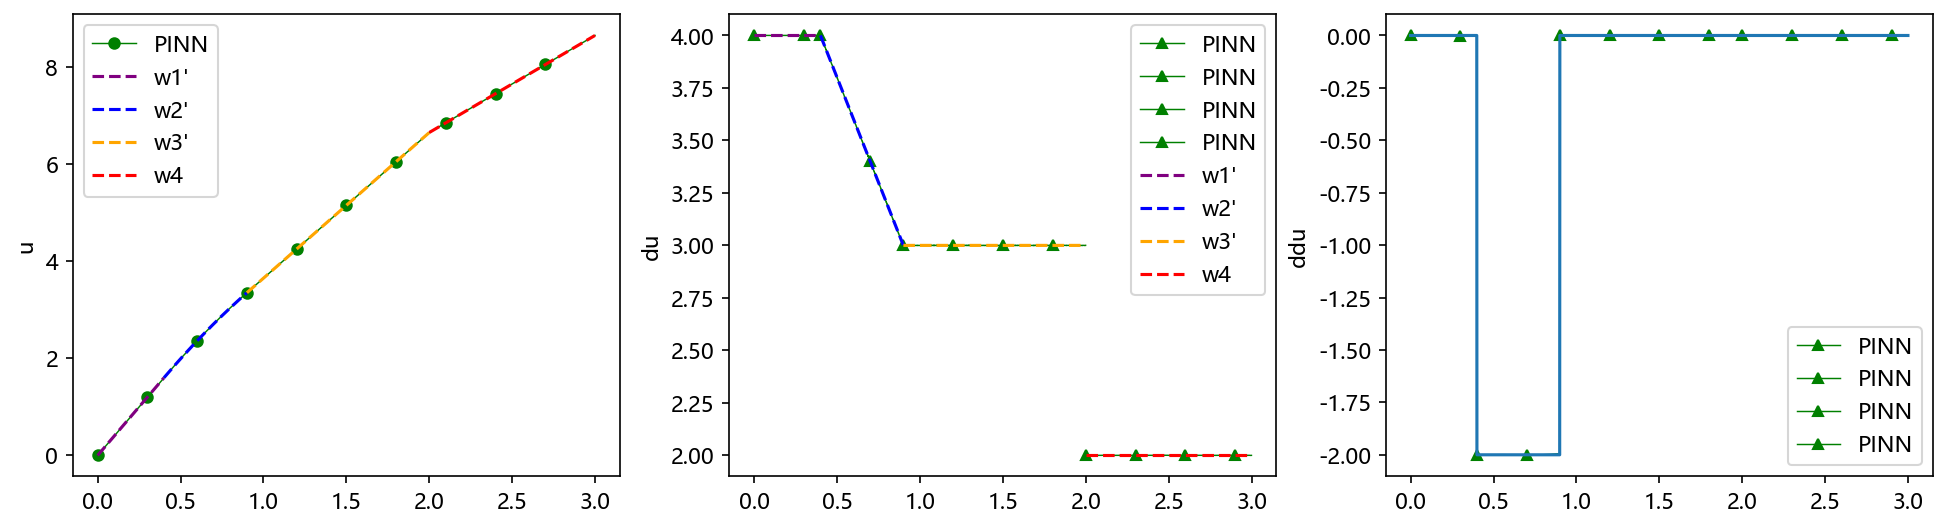

<Figure size 640x480 with 0 Axes>

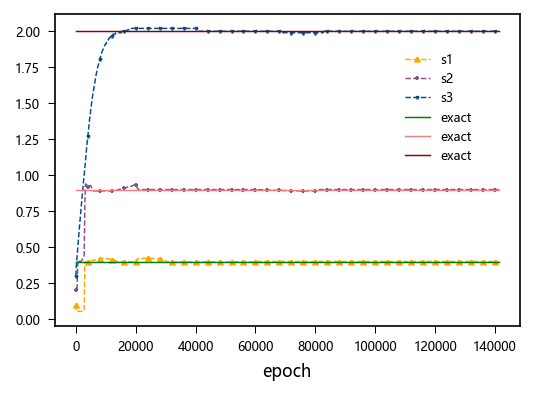

[0.4   0.9   2.    0.16  0.335 0.665]
[0.4   0.9   2.    0.16  0.335 0.665]
norm_Fai,norm_M,norm_V [2.75589649e-05 1.51978154e-04 7.97142465e-04 1.86421224e-04]
Weight [1.22663172 1.         5.24511217]
Compiling model...
'compile' took 9.291572 s

Adding new point: [[0.90010932]] 

Adding new point: [[0.90028461]] 

Adding new point: [[0.00018504]] 

Adding new point: [[0.00035746]] 

Adding new point: [[0.0009974]] 

Training model...

Step      Train loss                        Test loss                         Test metric
140000    [7.06e-08, 6.72e-11, 3.97e-07]    [7.55e-08, 4.99e-11, 8.80e-08]    []  
141000    [6.60e-08, 4.72e-11, 6.95e-08]    [7.64e-08, 5.44e-11, 9.13e-08]    []  
142000    [6.99e-08, 4.40e-09, 7.51e-08]    [8.23e-08, 1.39e-09, 9.95e-08]    []  
143000    [6.66e-08, 7.54e-11, 7.10e-08]    [7.76e-08, 4.85e-11, 9.32e-08]    []  
144000    [6.63e-08, 4.96e-10, 7.03e-08]    [7.68e-08, 1.41e-10, 9.28e-08]    []  
145000    [6.52e-08, 9.25e-11, 6.75e-08]    [7.39e-08

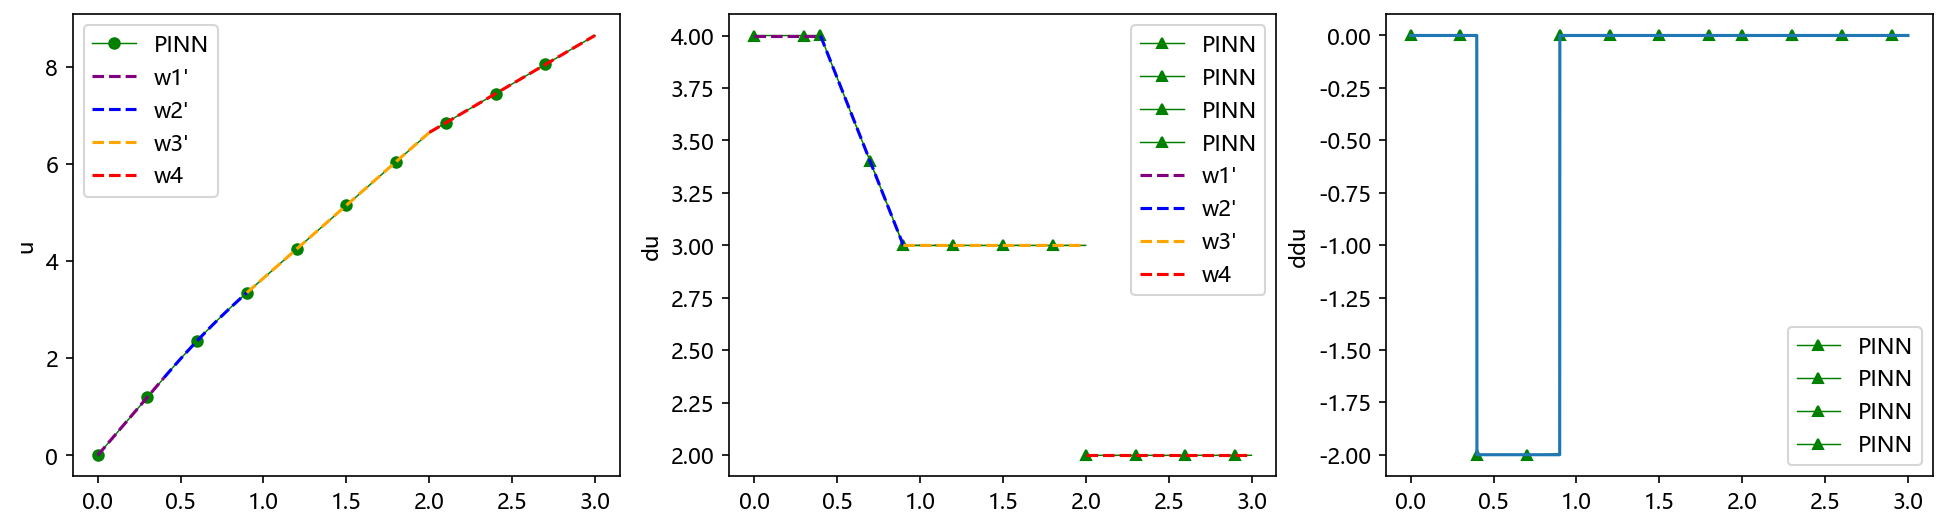

<Figure size 640x480 with 0 Axes>

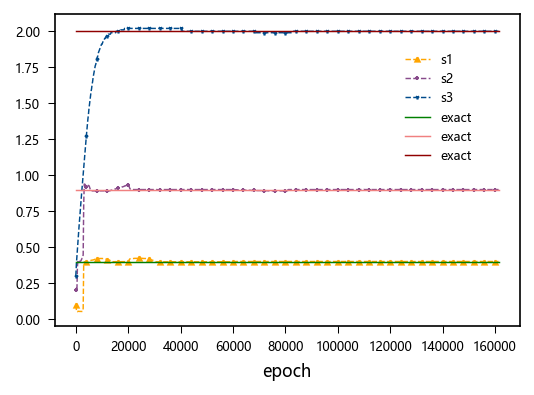

[0.4   0.9   2.    0.16  0.335 0.665]
[0.4   0.9   2.    0.16  0.335 0.665]


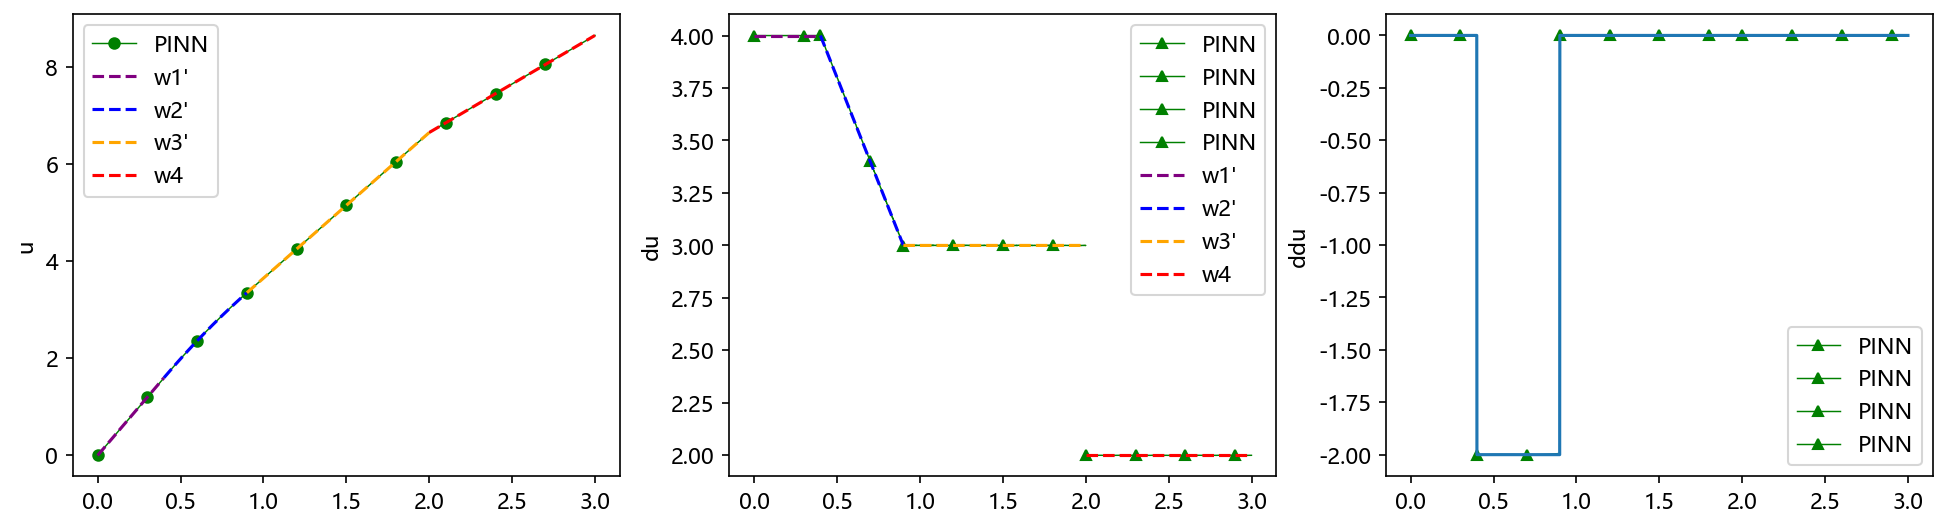

In [17]:
for i in range(7):
    import re
    lines = open("s1-s2.dat", "r").readlines()
    S = np.array(
        [
            np.fromstring(
                min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
                sep=",",
            )
            for line in lines
        ]
    )
    print(S[-1])
    interv1 = (X1>=0)&(X1<S[:,0:1][-1][0])
    interv2 = (X1>=S[:,0:1][-1][0])&(X1<S[:,1:2][-1][0])
    interv3 = (X1>=S[:,1:2][-1][0])&(X1<S[:,2:3][-1][0])
    interv4 = (X1>=S[:,2:3][-1][0])&(X1<=3)
    x0 = (X1[interv1]).reshape(-1,1)
    x1 = (X1[interv2]).reshape(-1,1)
    x2 = (X1[interv3]).reshape(-1,1)
    x3 = (X1[interv4]).reshape(-1,1)
    X2 = X1
    plt.rcParams.update({'font.size': 10.5})
    markersize=5
    markevery=300
    plt.figure(figsize=(16,4),dpi=150)
    plt.subplot(1,3,1)
    fai1 = model.predict(x0)[:,0:1]
    fai2 = model.predict(x1)[:,1:2]
    fai3 = model.predict(x2)[:,2:3]
    fai4 = model.predict(x3)[:,3:4]
    
    M1_dNN = model.predict(x0,operator=lambda x,y:dde.grad.jacobian(y,x,i=0,j=0))
    M2_dNN = model.predict(x1,operator=lambda x,y:dde.grad.jacobian(y,x,i=1,j=0))
    M3_dNN = model.predict(x2,operator=lambda x,y:dde.grad.jacobian(y,x,i=2,j=0))
    M4_dNN = model.predict(x3,operator=lambda x,y:dde.grad.jacobian(y,x,i=3,j=0))
    M_dNN = np.vstack((M1_dNN,M2_dNN,M3_dNN,M4_dNN))
    fai = np.vstack((fai1,fai2,fai3,fai4))
    plt.plot(X1,fai, label='PINN',color='green',marker='o',markersize=markersize,markevery=markevery,linewidth=0.7)
    plt.ylabel('u')
    plt.legend()

    plt.subplot(1,3,2)
    M1 = model.predict(x0)[:,4:5]
    M2 = model.predict(x1)[:,5:6]
    M3 = model.predict(x2)[:,6:7]
    M4 = model.predict(x3)[:,7:8]
    M = np.vstack((M1,M2,M3,M4))
    plt.plot(x0,M1, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
    plt.plot(x1,M2, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
    plt.plot(x2,M3, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
    plt.plot(x3,M4, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
    plt.ylabel('du')
    plt.legend()
    plt.subplot(1,3,3)
    V1 = model.predict(x0,operator=lambda x,y:dde.grad.jacobian(y,x,i=4,j=0))
    V2 = model.predict(x1,operator=lambda x,y:dde.grad.jacobian(y,x,i=5,j=0))
    V3 = model.predict(x2,operator=lambda x,y:dde.grad.jacobian(y,x,i=6,j=0))
    V4 = model.predict(x3,operator=lambda x,y:dde.grad.jacobian(y,x,i=7,j=0))
    V  = np.vstack((V1,V2,V3,V4))
    plt.plot(x0, V1, label='PINN',color='green',marker='^',markersize=markersize,\
             markevery=markevery,linewidth=0.7)
    plt.plot(x1, V2, label='PINN',color='green',marker='^',markersize=markersize,\
             markevery=markevery,linewidth=0.7)
    plt.plot(x2, V3, label='PINN',color='green',marker='^',markersize=markersize,\
             markevery=markevery,linewidth=0.7)
    plt.plot(x3, V4, label='PINN',color='green',marker='^',markersize=markersize,\
             markevery=markevery,linewidth=0.7)
    plt.plot(X1,ddWW1)
    plt.ylabel('ddu')
    plt.legend()
    ####真解
    dis = 0.75
    interv1 = (X1>=0)&(X1<0.4)
    interv2 = (X1>=0.4)&(X1<0.9)
    interv3 = (X1>=0.9)&(X1<2)
    interv4 = (X1>=2)&(X1<=3)
    x_vals_w0 = X1[interv1].reshape(-1,1)
    x_vals_w1 = X1[interv2].reshape(-1,1)
    x_vals_w2 = X1[interv3].reshape(-1,1)
    x_vals_w3 = X1[interv4].reshape(-1,1)
    # plt.figure(figsize=(18,7),dpi=150)
    plt.subplot(1, 3, 1)
    dW1 = WW1[interv1].reshape(-1,1)
    dW2 = WW1[interv2].reshape(-1,1)
    dW3 = WW1[interv3].reshape(-1,1)
    dW4 = WW1[interv4].reshape(-1,1)
    plt.plot(x_vals_w0, dW1, label="w1'", linestyle='dashed', color='purple')
    plt.plot(x_vals_w1, dW2, label="w2'", linestyle='dashed', color='blue')
    plt.plot(x_vals_w2, dW3, label="w3'", linestyle='dashed', color='orange')
    plt.plot(x_vals_w3, dW4, label='w4',linestyle='dashed', color='red')
    # plt.title('First Derivative')
    plt.legend()

    plt.subplot(1, 3, 2)
    ddW1 = dWW1[interv1].reshape(-1,1)
    ddW2 = dWW1[interv2].reshape(-1,1)
    ddW3 = dWW1[interv3].reshape(-1,1)
    ddW4 = dWW1[interv4].reshape(-1,1)
    plt.plot(x_vals_w0, ddW1, label="w1'", linestyle='dashed', color='purple')
    plt.plot(x_vals_w1, ddW2, label="w2'", linestyle='dashed', color='blue')
    plt.plot(x_vals_w2, ddW3, label="w3'", linestyle='dashed', color='orange')
    plt.plot(x_vals_w3, ddW4, label='w4',linestyle='dashed', color='red')
    # plt.title('First Derivative')
    plt.legend()
    plt.savefig('function fitting.png')

    norm_Fai = np.linalg.norm(fai-WW1,ord=2) / np.linalg.norm(WW1,ord=2)
    
    norm_M2 = np.linalg.norm(M-M_dNN,ord=2) / np.linalg.norm(M_dNN,ord=2)
    
    norm_M = np.linalg.norm(M-dWW1,ord=2) / np.linalg.norm(dWW1,ord=2)
    norm_V = np.linalg.norm(V-ddWW1,ord=2) / np.linalg.norm(ddWW1,ord=2)
    norm_Reslut = np.array([norm_Fai,norm_M,norm_V,norm_M2])
    norm_Reslut2 = np.array([norm_M2,norm_M,norm_V])
    print('norm_Fai,norm_M,norm_V',norm_Reslut)
    Weight = norm_Reslut2/np.min(norm_Reslut2)

    print('Weight',Weight)
    list_reslut.append(norm_Reslut)
    model.compile("adam", 1e-4,loss_weights=Weight)
    X = np.random.uniform(0,L,10000).reshape(-1,1)
    err_total = np.abs(model.predict(X, operator=beampde))  #计算前6项残差
    err_eq = np.sum(err_total,axis=0)
    x_ids = np.argsort(-err_eq,axis=0 )[:5]
    for elem in x_ids:
        print("Adding new point:", X[elem], "\n")
        list_point.append(X[elem][0][0])
        data.add_anchors(X[elem])
    losshistory, train_state = model.train(epochs=epochs, callbacks=[variable])
    # losshistory, train_state = model.train(epochs=epochs)
    dde.saveplot(losshistory, train_state, issave=True, isplot=False)
    Plot_dis()
import re
lines = open("s1-s2.dat", "r").readlines()
S = np.array(
    [
        np.fromstring(
            min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
            sep=",",
        )
        for line in lines
    ]
)
print(S[-1])
interv1 = (X1>=0)&(X1<S[:,0:1][-1][0])
interv2 = (X1>=S[:,0:1][-1][0])&(X1<S[:,1:2][-1][0])
interv3 = (X1>=S[:,1:2][-1][0])&(X1<S[:,2:3][-1][0])
interv4 = (X1>=S[:,2:3][-1][0])&(X1<=3)
x0 = (X1[interv1]).reshape(-1,1)
x1 = (X1[interv2]).reshape(-1,1)
x2 = (X1[interv3]).reshape(-1,1)
x3 = (X1[interv4]).reshape(-1,1)
X2 = X1
plt.rcParams.update({'font.size': 10.5})
markersize=5
markevery=300
plt.figure(figsize=(16,4),dpi=150)
plt.subplot(1,3,1)
fai1 = model.predict(x0)[:,0:1]
fai2 = model.predict(x1)[:,1:2]
fai3 = model.predict(x2)[:,2:3]
fai4 = model.predict(x3)[:,3:4]

M1_dNN = model.predict(x0,operator=lambda x,y:dde.grad.jacobian(y,x,i=0,j=0))
M2_dNN = model.predict(x1,operator=lambda x,y:dde.grad.jacobian(y,x,i=1,j=0))
M3_dNN = model.predict(x2,operator=lambda x,y:dde.grad.jacobian(y,x,i=2,j=0))
M4_dNN = model.predict(x3,operator=lambda x,y:dde.grad.jacobian(y,x,i=3,j=0))
M_dNN = np.vstack((M1_dNN,M2_dNN,M3_dNN,M4_dNN))

fai = np.vstack((fai1,fai2,fai3,fai4))
plt.plot(X1,fai, label='PINN',color='green',marker='o',markersize=markersize,markevery=markevery,linewidth=0.7)
plt.ylabel('u')
plt.legend()

plt.subplot(1,3,2)
M1 = model.predict(x0)[:,4:5]
M2 = model.predict(x1)[:,5:6]
M3 = model.predict(x2)[:,6:7]
M4 = model.predict(x3)[:,7:8]
M = np.vstack((M1,M2,M3,M4))
plt.plot(x0,M1, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
plt.plot(x1,M2, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
plt.plot(x2,M3, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
plt.plot(x3,M4, label='PINN',color='green',marker='^',markersize=markersize,markevery=markevery,linewidth=0.7)
# plt.plot(x,model.predict(x,operator=lambda x,y:dde.grad.jacobian(y,x,i=1,j=0)), label='dy_xx',marker='.',markersize=markersize,markevery=40,linewidth=0.7)
# plt.plot(x,x*0-20,'-.',linewidth=0.7)
plt.ylabel('du')
plt.legend()
plt.subplot(1,3,3)
V1 = model.predict(x0,operator=lambda x,y:dde.grad.jacobian(y,x,i=4,j=0))
V2 = model.predict(x1,operator=lambda x,y:dde.grad.jacobian(y,x,i=5,j=0))
V3 = model.predict(x2,operator=lambda x,y:dde.grad.jacobian(y,x,i=6,j=0))
V4 = model.predict(x3,operator=lambda x,y:dde.grad.jacobian(y,x,i=7,j=0))
V  = np.vstack((V1,V2,V3,V4))
plt.plot(x0, V1, label='PINN',color='green',marker='^',markersize=markersize,\
         markevery=markevery,linewidth=0.7)
plt.plot(x1, V2, label='PINN',color='green',marker='^',markersize=markersize,\
         markevery=markevery,linewidth=0.7)
plt.plot(x2, V3, label='PINN',color='green',marker='^',markersize=markersize,\
         markevery=markevery,linewidth=0.7)
plt.plot(x3, V4, label='PINN',color='green',marker='^',markersize=markersize,\
         markevery=markevery,linewidth=0.7)
plt.plot(X1,ddWW1)
# plt.plot(x,model.predict(x,operator=lambda x,y:dde.grad.jacobian(y,x,i=1,j=0)), label='dy_xx',marker='.',markersize=markersize,markevery=40,linewidth=0.7)
# plt.plot(x,x*0-20,'-.',linewidth=0.7)
plt.ylabel('ddu')
plt.legend()
####
dis = 0.75
interv1 = (X1>=0)&(X1<0.4)
interv2 = (X1>=0.4)&(X1<0.9)
interv3 = (X1>=0.9)&(X1<2)
interv4 = (X1>=2)&(X1<=3)
x_vals_w0 = X1[interv1].reshape(-1,1)
x_vals_w1 = X1[interv2].reshape(-1,1)
x_vals_w2 = X1[interv3].reshape(-1,1)
x_vals_w3 = X1[interv4].reshape(-1,1)
# plt.figure(figsize=(18,7),dpi=150)
plt.subplot(1, 3, 1)
dW1 = WW1[interv1].reshape(-1,1)
dW2 = WW1[interv2].reshape(-1,1)
dW3 = WW1[interv3].reshape(-1,1)
dW4 = WW1[interv4].reshape(-1,1)
plt.plot(x_vals_w0, dW1, label="w1'", linestyle='dashed', color='purple')
plt.plot(x_vals_w1, dW2, label="w2'", linestyle='dashed', color='blue')
plt.plot(x_vals_w2, dW3, label="w3'", linestyle='dashed', color='orange')
plt.plot(x_vals_w3, dW4, label='w4',linestyle='dashed', color='red')
# plt.title('First Derivative')
plt.legend()

plt.subplot(1, 3, 2)
ddW1 = dWW1[interv1].reshape(-1,1)
ddW2 = dWW1[interv2].reshape(-1,1)
ddW3 = dWW1[interv3].reshape(-1,1)
ddW4 = dWW1[interv4].reshape(-1,1)
plt.plot(x_vals_w0, ddW1, label="w1'", linestyle='dashed', color='purple')
plt.plot(x_vals_w1, ddW2, label="w2'", linestyle='dashed', color='blue')
plt.plot(x_vals_w2, ddW3, label="w3'", linestyle='dashed', color='orange')
plt.plot(x_vals_w3, ddW4, label='w4',linestyle='dashed', color='red')
# plt.title('First Derivative')
plt.legend()
plt.savefig('function fitting.png')